In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
meal_features = pd.read_csv('./meal_features.csv')
user_features = pd.read_csv('./user_features.csv')
previous_meals = pd.read_csv('./meals_previously_seen.csv')
meals_to_send = pd.read_csv('./meals_to_be_sent.csv')

# Part 1: Exploring the files

## Exploring Meal Features data

In [3]:
meal_features.head()

,meal_id,cuisine,large_portion,number_of_reviews,avg_review_score
0,1134,thai,False,101,3.349452
1,1846,american,False,111,5.000000
2,1762,latin,False,220,4.882706
3,1254,middle-eastern,True,446,5.000000
4,1493,korean,True,513,-1.000000


In [4]:
meal_features.shape

(1000, 5)

In [5]:
meal_features.describe()

,meal_id,number_of_reviews,avg_review_score
count,1000.000000,1.000000e+03,1000.000000
mean,1499.500000,1.157725e+05,2.660656
std,288.819436,5.028997e+05,1.741875
min,1000.000000,6.600000e+01,-1.000000
25%,1249.750000,2.570000e+02,1.428969
50%,1499.500000,4.710000e+02,2.769397
75%,1749.250000,7.042500e+02,4.180860
max,1999.000000,2.307390e+06,5.000000


In [6]:
meal_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
meal_id              1000 non-null int64
cuisine              1000 non-null object
large_portion        1000 non-null bool
number_of_reviews    1000 non-null int64
avg_review_score     1000 non-null float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.3+ KB


In [7]:
meal_features.nunique()

meal_id              1000
cuisine                11
large_portion           2
number_of_reviews     602
avg_review_score      828
dtype: int64

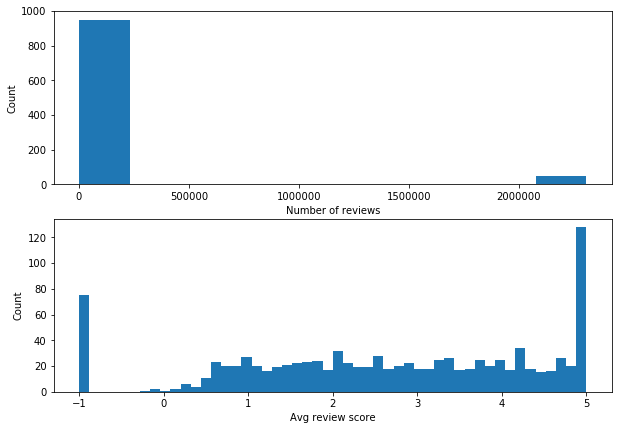

In [8]:
fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].hist(meal_features['number_of_reviews'])
ax[0].set(xlabel='Number of reviews', ylabel='Count')
ax[1].hist(meal_features['avg_review_score'], bins=50)
ax[1].set(xlabel='Avg review score', ylabel='Count')
plt.show()

In [9]:
print meal_features[meal_features['number_of_reviews'] > 200000].shape
meal_features[meal_features['number_of_reviews'] > 200000].head()

(50, 5)


,meal_id,cuisine,large_portion,number_of_reviews,avg_review_score
8,1093,italian,True,2307325,0.922366
17,1929,japanese,True,2306891,0.960206
18,1885,middle-eastern,True,2306305,2.776561
40,1952,american,False,2307109,4.892617
63,1631,mediterranean,True,2306307,2.192205


In [10]:
print meal_features[meal_features['avg_review_score'] < 1].shape
meal_features[meal_features['avg_review_score'] < 1].head()

(184, 5)


,meal_id,cuisine,large_portion,number_of_reviews,avg_review_score
4,1493,korean,True,513,-1.000000
8,1093,italian,True,2307325,0.922366
10,1827,italian,True,528,-1.000000
17,1929,japanese,True,2306891,0.960206
25,1411,vegetarian,True,847,-1.000000


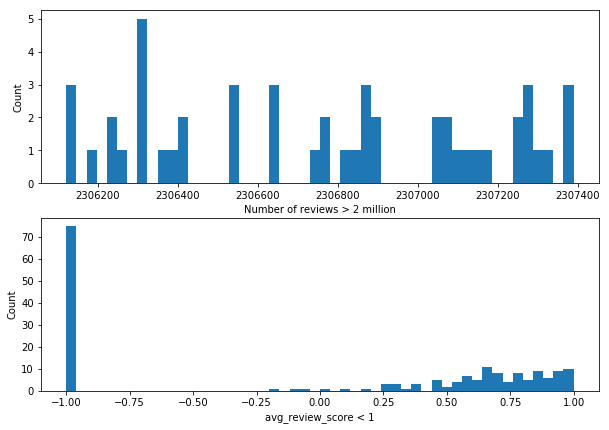

In [11]:
fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].hist(meal_features[meal_features['number_of_reviews'] > 200000]['number_of_reviews'], bins=50)
ax[0].set(xlabel='Number of reviews > 2 million', ylabel='Count')
ax[1].hist(meal_features[meal_features['avg_review_score'] < 1]['avg_review_score'], bins=50)
ax[1].set(xlabel='avg_review_score < 1', ylabel='Count')
plt.show()

Observations:

- 1000 unique meals

- The distribution of the number of reviews is highly skewed with the outliers having more than 2 million reviews.

- Additionally, the distribution of average review score indicates a large number of 5s and -1s. How does one interpret a -1 average review score?

## Exploring User Features data

In [12]:
user_features.head()

,user_id,number_of_subscription_cycles,ordered_yesterday,favorite_cuisines
0,104939,2,True,"['korean', 'italian', 'chinese', 'vegetarian',..."
1,101562,2,True,"['mediterranean', 'indian', 'thai', 'american'..."
2,102343,2,True,"['thai', 'italian', 'japanese', 'chinese']"
3,106728,5,True,"['vegetarian', 'mediterranean']"
4,107179,0,True,"['italian', 'korean', 'american', 'japanese', ..."


In [13]:
user_features.shape

(12000, 4)

In [14]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
user_id                          12000 non-null int64
number_of_subscription_cycles    11500 non-null object
ordered_yesterday                12000 non-null bool
favorite_cuisines                12000 non-null object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.0+ KB


In [15]:
user_features['number_of_subscription_cycles'].value_counts()

2     2710
1     2399
6+    2368
0     2196
5     1057
4      711
3       59
Name: number_of_subscription_cycles, dtype: int64

In [16]:
"Null values: {}".format(user_features['number_of_subscription_cycles'].isnull().sum())

'Null values: 500'

In [17]:
copy_user_features = user_features.copy()

In [18]:
copy_user_features.fillna(0, inplace=True)

In [19]:
copy_user_features['number_of_subscription_cycles'] = \
                    pd.to_numeric(copy_user_features['number_of_subscription_cycles'], errors='coerce')

In [20]:
copy_user_features.fillna(6, inplace=True)

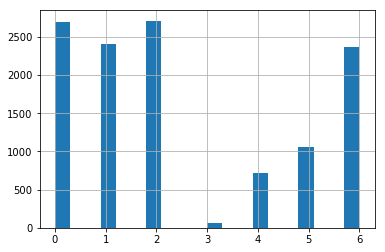

In [21]:
copy_user_features['number_of_subscription_cycles'].hist(bins=20)

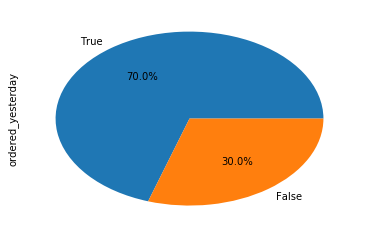

In [22]:
user_features['ordered_yesterday'].value_counts().plot.pie(autopct='%1.1f%%')

Observations:

- 12000 unique users
- 500 "number of subscription cycles" were null values
- 2368 users have been subscribers for 6 or more cycles

In order to create the above histogram, I assumed the null values were zeroes and converted 6+ to 6.
It seems like the population of users consists of recent/new users and long-term users with a drop-off of users between these 2 categories.

## Exploring Previous Meals Shown data

In [23]:
previous_meals.head()

,user_id,meal_id,ordered
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


In [24]:
previous_meals.shape

(35990, 3)

In [25]:
previous_meals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 3 columns):
user_id    35990 non-null int64
meal_id    35990 non-null int64
ordered    35990 non-null bool
dtypes: bool(1), int64(2)
memory usage: 597.6 KB


In [26]:
previous_meals.nunique()

user_id    7200
meal_id    1000
ordered       2
dtype: int64

In [27]:
previous_meals.groupby('user_id').size().value_counts()

5    7190
4      10
dtype: int64

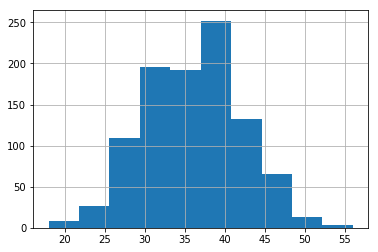

In [28]:
previous_meals['meal_id'].value_counts().hist()

Observations:
- This contains data of 5 previous meals shown to 7,200 users. However 10 users were only  shown 4 meals.
- 35990 meals shown to 7,200 users

## Exploring Meals to be Sent data

In [29]:
meals_to_send.head()

,user_id,meal_id
0,108618,1663
1,110536,1254
2,104197,1798
3,107151,1948
4,106773,1179


In [30]:
meals_to_send.shape

(56390, 2)

In [31]:
meals_to_send.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56390 entries, 0 to 56389
Data columns (total 2 columns):
user_id    56390 non-null int64
meal_id    56390 non-null int64
dtypes: int64(2)
memory usage: 881.2 KB


In [32]:
meals_to_send.nunique()

user_id    11280
meal_id     1000
dtype: int64

In [33]:
meals_to_send.groupby('user_id').size().value_counts()

5    11270
4       10
dtype: int64

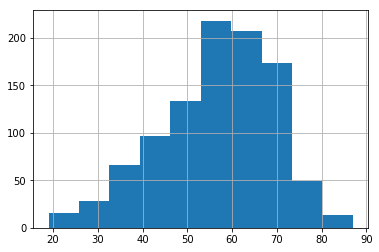

In [34]:
meals_to_send['meal_id'].value_counts().hist()

Observations:

- This contains data of the 5 meals to be shown to 11,280 users. However 10 users are to be shown only 4 meals.
- 56390 meals to be shown

# Part 2: Cleaning the Data and Assumptions

## Meal Features

Assumptions:

- For the meals with more than 2 million reviews, I have assigned these values with the mean of the remaining number of reviews.
- The review system is from 1 - 5 discrete values. A review score of -1 indicates the meal was never reviewed. However, averaging review scores from 1 - 5 and -1 result in values between -1 and 1. As a result, I will be assigning any values in this range with the mean of the remaining average review scores.

Additionally, converted True/False to 1/0.

In [35]:
copy_meal_features = meal_features.copy()

In [36]:
mean_reviews = copy_meal_features[copy_meal_features['number_of_reviews'] < 2000000]['number_of_reviews'].mean()
mean_reviews

457.1484210526316

In [37]:
copy_meal_features.loc[copy_meal_features['number_of_reviews'] > 2000000, 'number_of_reviews'] = mean_reviews

In [38]:
mean_review_score = copy_meal_features[copy_meal_features['avg_review_score'] >= 1]['avg_review_score'].mean()
mean_review_score

3.26269050557843

In [39]:
copy_meal_features.loc[copy_meal_features['avg_review_score'] < 1, 'avg_review_score'] = mean_review_score

In [40]:
copy_meal_features['large_portion'] = copy_meal_features['large_portion'].map({True: 1, False: 0})

In [41]:
copy_meal_features.head()

,meal_id,cuisine,large_portion,number_of_reviews,avg_review_score
0,1134,thai,0,101.0,3.349452
1,1846,american,0,111.0,5.000000
2,1762,latin,0,220.0,4.882706
3,1254,middle-eastern,1,446.0,5.000000
4,1493,korean,1,513.0,3.262691


## User Features

Created 11 dummies for the 11 unique cuisines. The baseline in this case is having no favorite cuisine.

Additionally, converted True/False to 1/0.

In [42]:
dummies = copy_user_features['favorite_cuisines'].str.strip("[]").str.get_dummies(sep=', ')

In [43]:
copy_user_features['number_of_subscription_cycles'] = \
                    copy_user_features['number_of_subscription_cycles'].astype(int)

In [44]:
copy_user_features = pd.concat((copy_user_features, dummies), axis=1)

In [45]:
copy_user_features.drop(columns='favorite_cuisines', inplace=True)

In [46]:
copy_user_features['ordered_yesterday'] = copy_user_features['ordered_yesterday'].map({True: 1, False: 0})

In [47]:
copy_user_features.head()

,user_id,number_of_subscription_cycles,ordered_yesterday,'american','chinese','indian','italian','japanese','korean','latin','mediterranean','middle-eastern','thai','vegetarian'
0,104939,2,1,0,1,1,1,1,1,1,0,1,1,1
1,101562,2,1,1,1,1,1,0,1,0,1,0,1,0
2,102343,2,1,0,1,0,1,1,0,0,0,0,1,0
3,106728,5,1,0,0,0,0,0,0,0,1,0,0,1
4,107179,0,1,1,0,0,1,1,1,1,1,1,0,0


## Previous Meals Shown

Converted True/False to 1/0.

In [48]:
copy_previous_meals = previous_meals.copy()

In [49]:
copy_previous_meals['ordered'] = copy_previous_meals['ordered'].map({True: 1, False: 0})

In [50]:
copy_previous_meals.head()

,user_id,meal_id,ordered
0,104863,1350,0
1,108656,1321,1
2,100120,1110,0
3,104838,1443,1
4,107304,1397,1


# Part 3.1: Modeling with Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000)

In [53]:
X = copy_previous_meals.merge(copy_user_features).merge(copy_meal_features)
X = pd.concat([X.drop('cuisine', axis=1), pd.get_dummies(X['cuisine'], prefix='meal_is', drop_first=True)], axis=1)
y = X['ordered']
X.drop(['user_id', 'ordered'], axis=1, inplace=True)
X.set_index('meal_id', inplace=True)

In [54]:
test = meals_to_send.merge(copy_user_features).merge(copy_meal_features)
test = pd.concat([test.drop('cuisine', axis=1), pd.get_dummies(test['cuisine'], prefix='meal_is', drop_first=True)], axis=1)
test.drop('user_id', axis=1, inplace=True)
test.set_index('meal_id', inplace=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [57]:
rf.score(X_test, y_test)

0.73464851347596549

In [58]:
predicted_meals_rf = pd.DataFrame(pd.concat([meals_to_send, pd.DataFrame(rf.predict_proba(test))], axis=1))

In [59]:
predicted_meals_rf_over_50 = predicted_meals_rf[predicted_meals_rf[1] > .5]

In [70]:
predicted_meals_rf_table = pd.DataFrame(predicted_meals_rf_over_50.groupby(['user_id'])[1].max()\
                                        .reset_index().merge(predicted_meals_rf)['meal_id']\
                                        .value_counts().sort_index())


### Table of meals and predicted amounts (Random Forest)

In [77]:
predicted_meals_rf_table

,meal_id
1000,11
1001,14
1002,8
1003,14
1004,4
1005,9
1006,15
1007,12
1008,8
1009,9


### Feature importance

In [61]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, \
                                   columns=['importance']).sort_values('importance', ascending=False)

In [62]:
feature_importances

,importance
number_of_reviews,0.343465
avg_review_score,0.147566
number_of_subscription_cycles,0.095331
'middle-eastern',0.029246
'italian',0.029187
'american',0.029046
'japanese',0.028722
'mediterranean',0.027650
'korean',0.027600
'vegetarian',0.027515


# Part 3.2 Modeling with Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log = LogisticRegression(random_state=1)

In [65]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
log.score(X_test, y_test)

0.6319811058627397

In [67]:
predicted_meals_log = pd.DataFrame(pd.concat([meals_to_send, pd.DataFrame(log.predict_proba(test))], axis=1))

In [68]:
predicted_meals_log_over_50 = predicted_meals_log[predicted_meals_log[1] > .5]

In [72]:
predicted_meals_log_table = pd.DataFrame(predicted_meals_log_over_50.groupby(['user_id'])[1].max()\
                                         .reset_index().merge(predicted_meals_log)['meal_id']\
                                         .value_counts().sort_index())

### Table of meals and predicted amounts (Logistic Regression)

In [76]:
predicted_meals_log_table

,meal_id
1000,4
1001,7
1002,9
1003,7
1004,2
1005,9
1006,3
1007,5
1008,7
1009,2
